In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = 'Sensor Data.csv'
df = pd.read_csv(file_path)
df.head()


,Freq [GHz],S12 Mag,S13 Mag,S14 Mag,S23 Mag,S24 Mag,S34 Mag,S12 Phase,S13 Phase,S14 Phase,...,S11 Mag,S22 Mag,S33 Mag,S44 Mag,S11 Phase,S22 Phase,S33 Phase,S44 Phase,Unnamed: 21,Size
0,0.5000,-37.187724,-31.418885,-34.128856,-29.037817,-33.332027,-40.789799,164.926277,149.138013,-143.880974,...,-0.331620,-0.204848,-0.397357,-0.219184,-13.935012,-23.023129,-21.882408,-17.095157,NaN,20
1,0.5058,-36.529669,-31.647838,-32.657613,-32.239524,-34.754974,-41.211043,156.204499,146.762764,-145.747771,...,-0.263459,-0.195931,-0.454456,-0.201555,-14.192140,-23.267137,-22.690164,-17.715602,NaN,20
2,0.5116,-35.776202,-31.917526,-31.326502,-34.768130,-36.353212,-42.016227,145.866520,144.636798,-149.366067,...,-0.224686,-0.184203,-0.533002,-0.191447,-14.698938,-23.579309,-23.310765,-18.269225,NaN,20
3,0.5174,-34.788751,-31.919946,-29.916169,-36.361959,-37.893149,-43.354957,136.036378,142.489474,-154.253116,...,-0.193858,-0.179147,-0.634686,-0.190974,-15.257679,-23.900862,-23.773387,-18.986116,NaN,20
4,0.5232,-33.955711,-31.922941,-28.488877,-37.732709,-39.603751,-45.046499,125.617079,139.395481,-161.396789,...,-0.188661,-0.178598,-0.805936,-0.194009,-15.601821,-24.109574,-23.818354,-19.463586,NaN,20


In [3]:
df.info()
# See no nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002 entries, 0 to 2001
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Freq [GHz]   2002 non-null   float64
 1   S12 Mag      2002 non-null   float64
 2   S13 Mag      2002 non-null   float64
 3   S14 Mag      2002 non-null   float64
 4   S23 Mag      2002 non-null   float64
 5   S24 Mag      2002 non-null   float64
 6   S34 Mag      2002 non-null   float64
 7   S12 Phase    2002 non-null   float64
 8   S13 Phase    2002 non-null   float64
 9   S14 Phase    2002 non-null   float64
 10  S23 Phase    2002 non-null   float64
 11  S24 Phase    2002 non-null   float64
 12  S34 Phase    2002 non-null   float64
 13  S11 Mag      2002 non-null   float64
 14  S22 Mag      2002 non-null   float64
 15  S33 Mag      2002 non-null   float64
 16  S44 Mag      2002 non-null   float64
 17  S11 Phase    2002 non-null   float64
 18  S22 Phase    2002 non-null   float64
 19  S33 Ph

In [4]:
print(df.isnull().sum())
print(df.describe())

Freq [GHz]        0
S12 Mag           0
S13 Mag           0
S14 Mag           0
S23 Mag           0
S24 Mag           0
S34 Mag           0
S12 Phase         0
S13 Phase         0
S14 Phase         0
S23 Phase         0
S24 Phase         0
S34 Phase         0
S11 Mag           0
S22 Mag           0
S33 Mag           0
S44 Mag           0
S11 Phase         0
S22 Phase         0
S33 Phase         0
S44 Phase         0
Unnamed: 21    2002
Size              0
dtype: int64
        Freq [GHz]      S12 Mag      S13 Mag      S14 Mag      S23 Mag  \
count  2002.000000  2002.000000  2002.000000  2002.000000  2002.000000   
mean      3.400000   -15.621380   -24.409410   -28.882434   -28.810231   
std       1.676408    10.783611     5.528826     4.899236     4.498628   
min       0.500000   -50.778244   -54.643530   -54.861044   -63.770951   
25%       1.950000   -24.672301   -26.526568   -31.066301   -29.475228   
50%       3.400000   -20.306779   -23.299866   -27.664723   -27.555138   
75%      

In [5]:
df = df.drop(columns=['Unnamed: 21'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002 entries, 0 to 2001
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Freq [GHz]  2002 non-null   float64
 1   S12 Mag     2002 non-null   float64
 2   S13 Mag     2002 non-null   float64
 3   S14 Mag     2002 non-null   float64
 4   S23 Mag     2002 non-null   float64
 5   S24 Mag     2002 non-null   float64
 6   S34 Mag     2002 non-null   float64
 7   S12 Phase   2002 non-null   float64
 8   S13 Phase   2002 non-null   float64
 9   S14 Phase   2002 non-null   float64
 10  S23 Phase   2002 non-null   float64
 11  S24 Phase   2002 non-null   float64
 12  S34 Phase   2002 non-null   float64
 13  S11 Mag     2002 non-null   float64
 14  S22 Mag     2002 non-null   float64
 15  S33 Mag     2002 non-null   float64
 16  S44 Mag     2002 non-null   float64
 17  S11 Phase   2002 non-null   float64
 18  S22 Phase   2002 non-null   float64
 19  S33 Phase   2002 non-null  

In [6]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
tumor_size_labels = (df_numeric['Size'] == '20').astype(int)  # 0: No tumor, 1: 20mm tumor




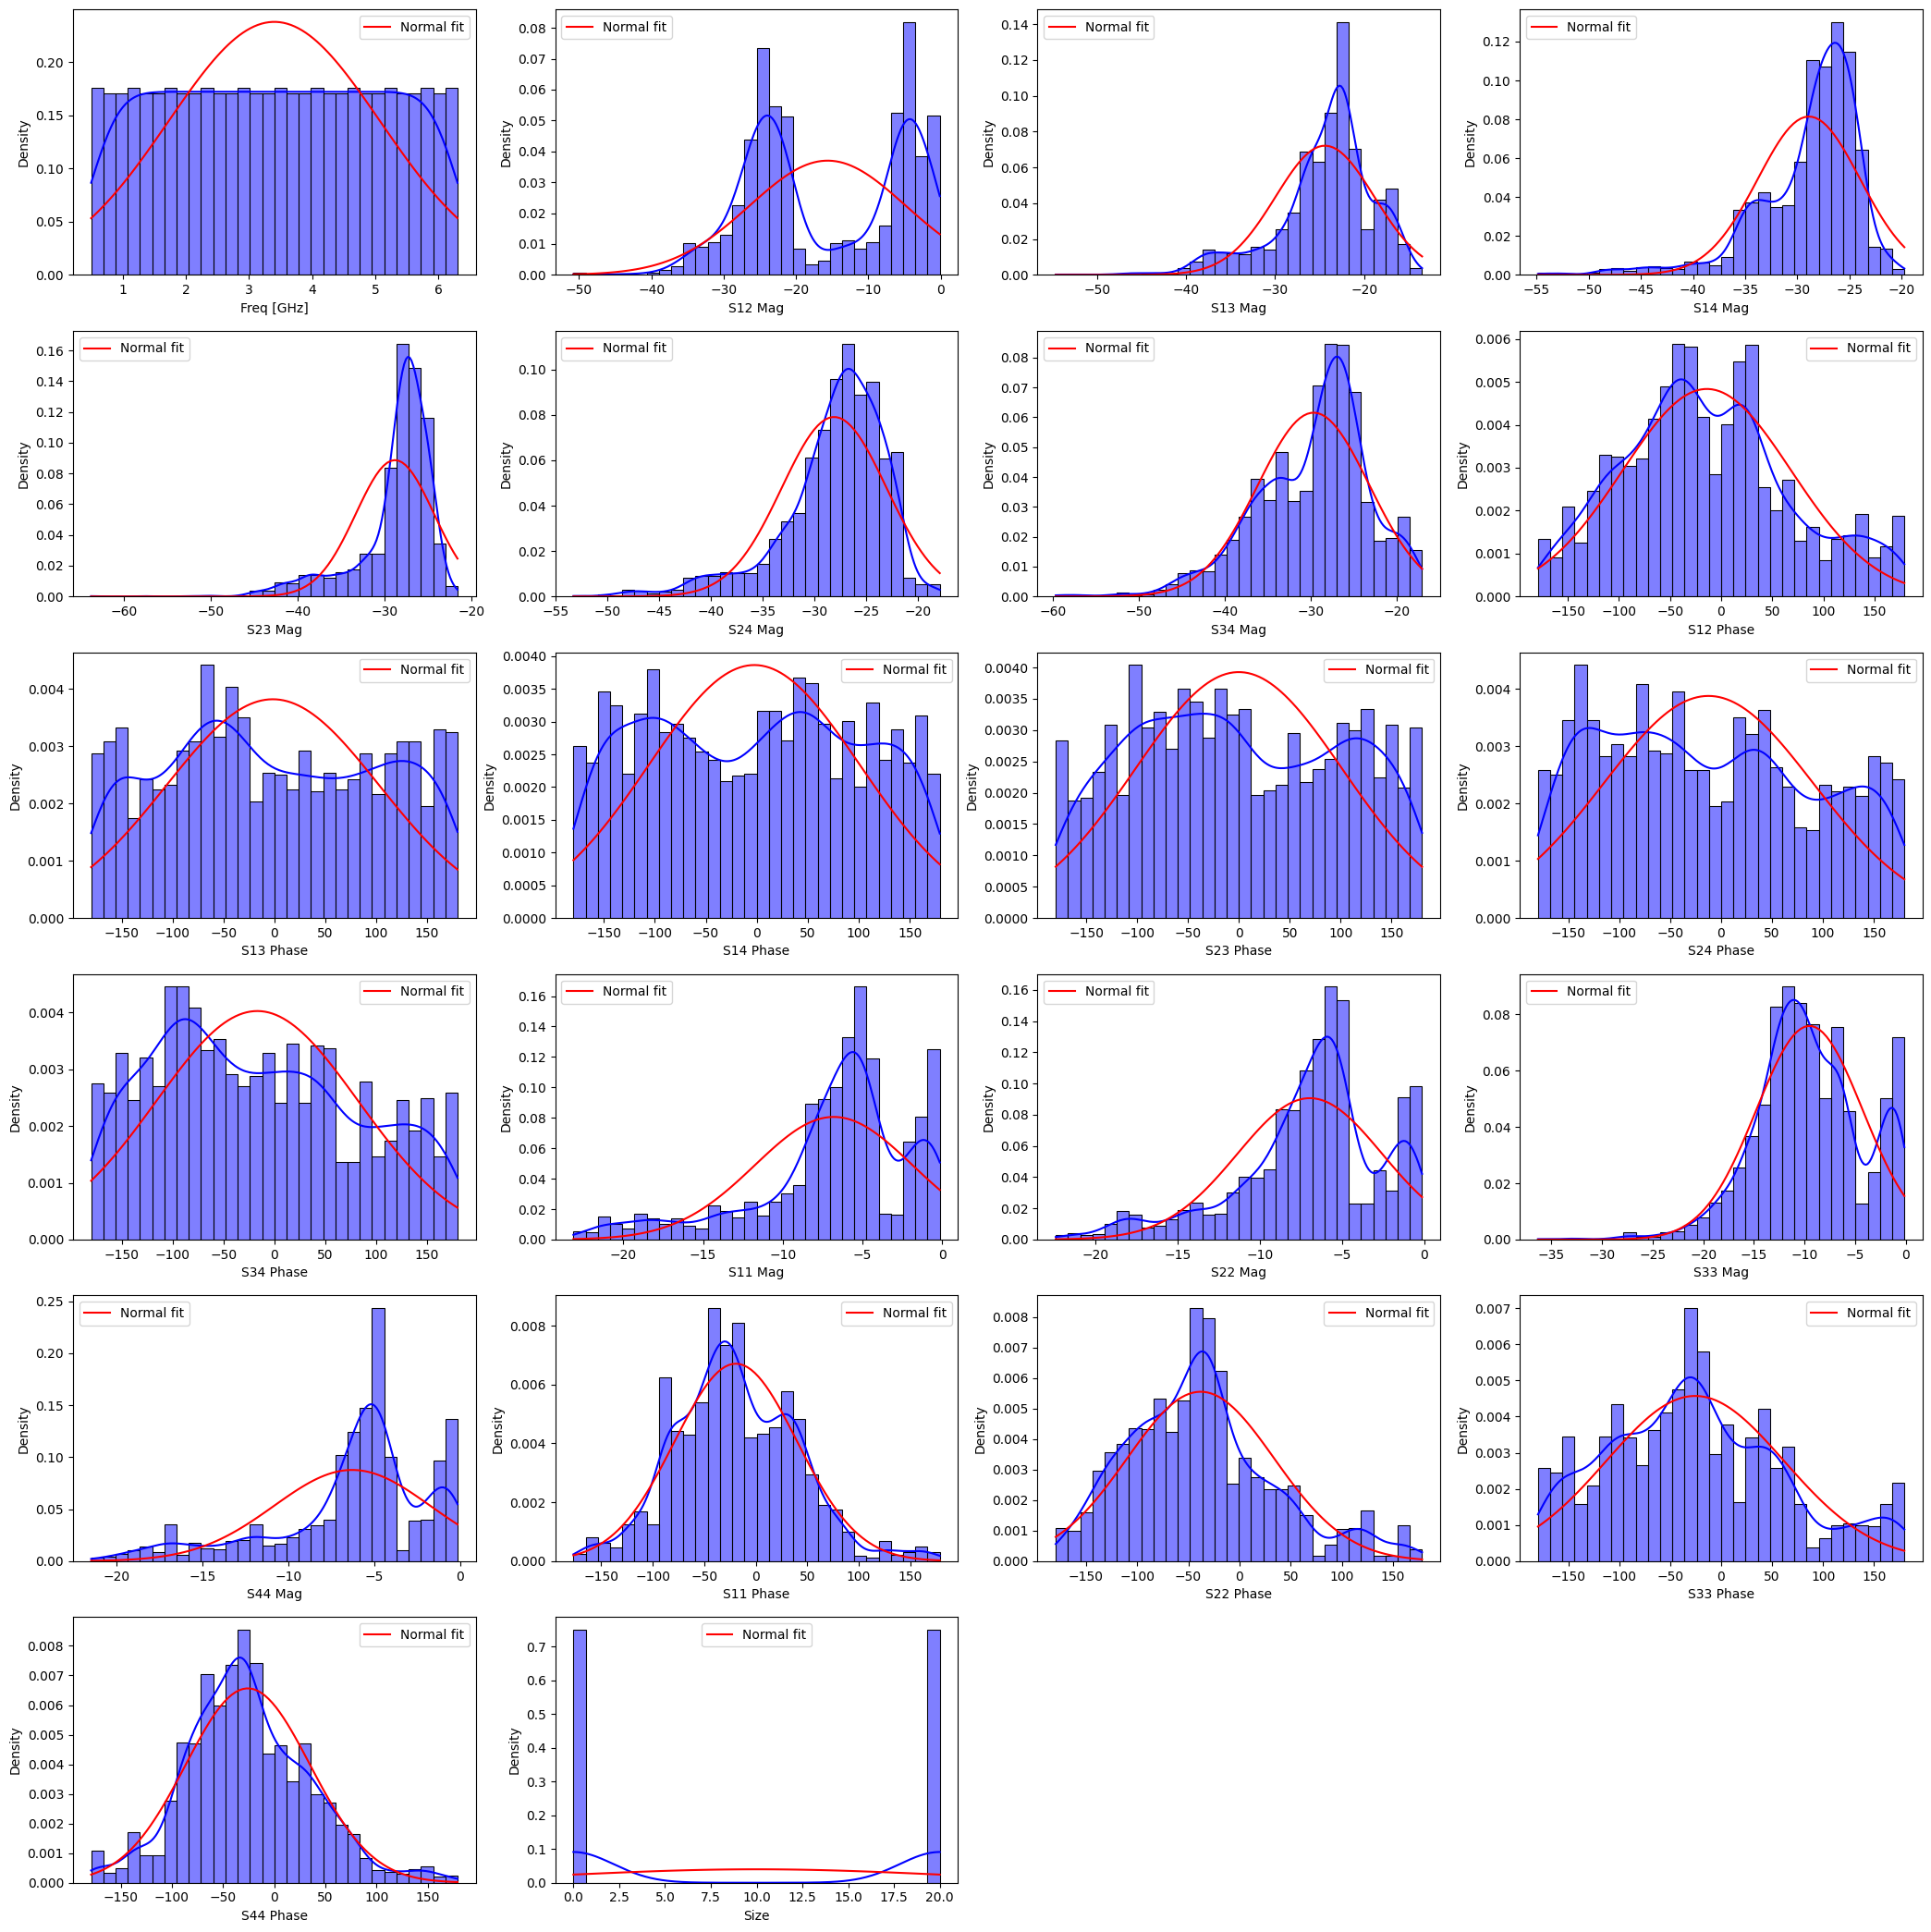

In [7]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(21, 21))

for i, col in enumerate(df_numeric.columns):
    ax = plt.subplot(6, 4, i + 1)  # Adjust grid size to fit all columns
    sns.histplot(df_numeric[col], kde=True, stat="density", ax=ax, color="blue", bins=30)

    # Overlay a normal distribution if the column has enough data
    if df_numeric[col].notna().sum() > 1:
        mean = df_numeric[col].mean()
        std = df_numeric[col].std()
        x = np.linspace(df_numeric[col].min(), df_numeric[col].max(), 100)
        y = norm.pdf(x, mean, std)
        ax.plot(x, y, color="red", label="Normal fit")

    ax.set_xlabel(col)
    ax.legend()

plt.tight_layout()
plt.show()



Removing Outliers

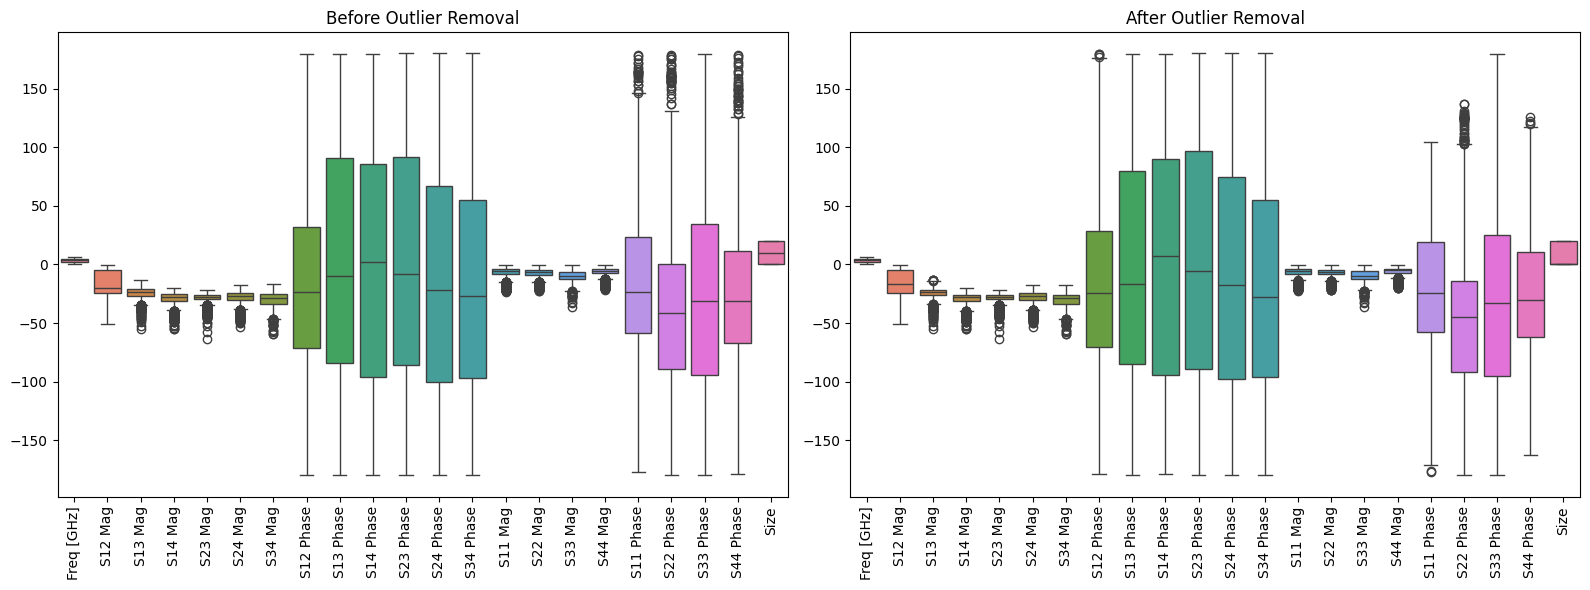

In [8]:
df_scaled = pd.DataFrame(df_numeric, columns=df.columns)

# Apply Z-score method for outlier removal
from scipy.stats import zscore
z_scores = zscore(df_scaled)
df_cleaned = df_scaled[(z_scores < 2.5).all(axis=1)]

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df_scaled)
plt.title("Before Outlier Removal")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.boxplot(data=df_cleaned)
plt.title("After Outlier Removal")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Normalization

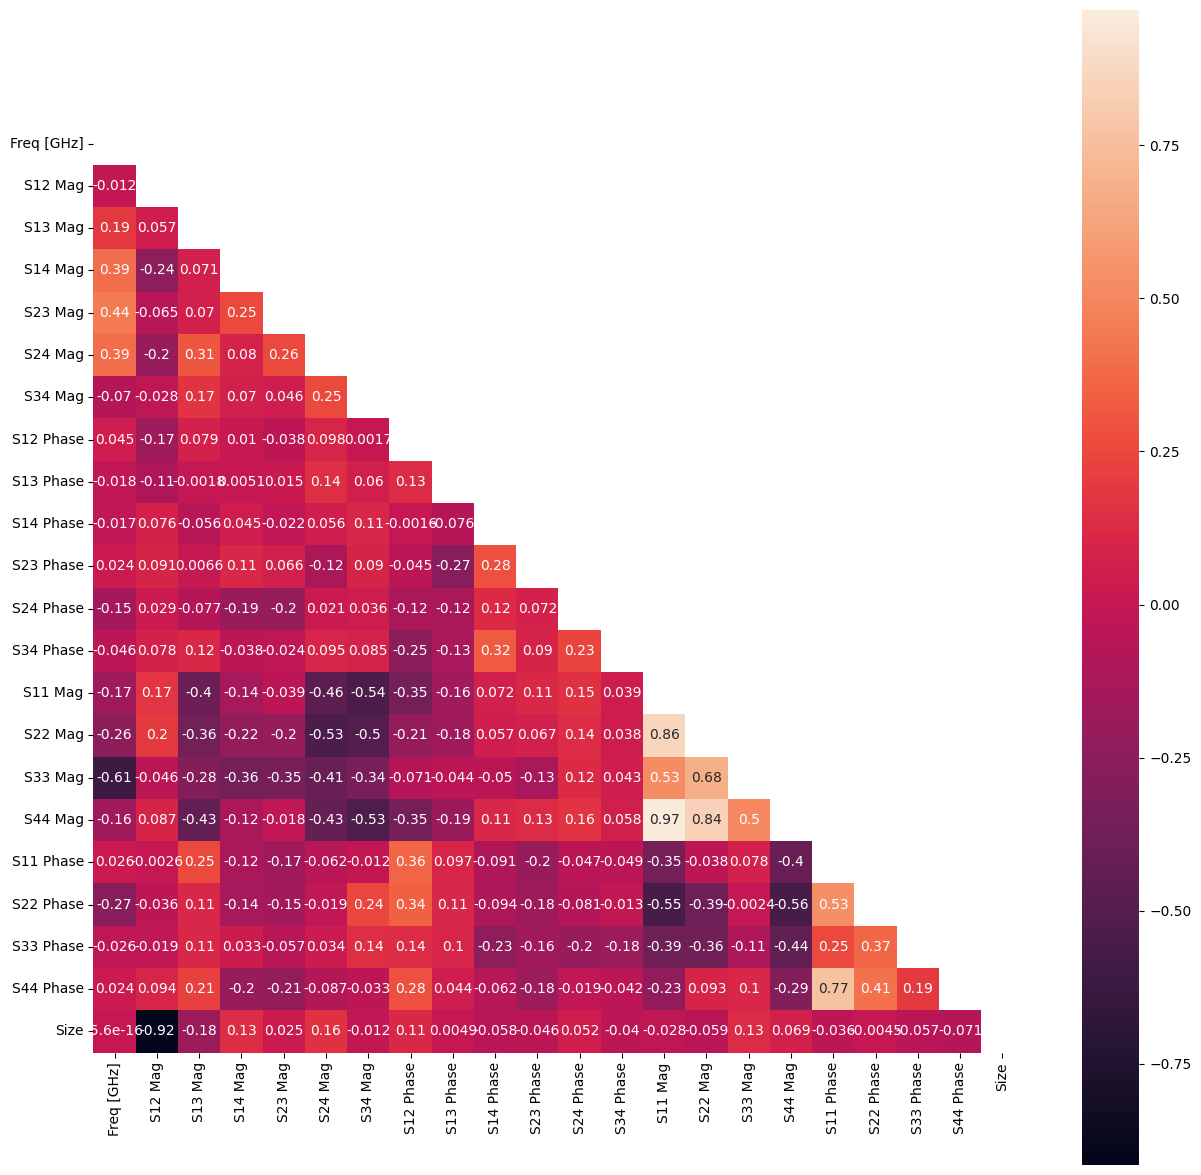

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_scaled)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

plt.figure(figsize=(15,15))
sns.heatmap(df_scaled.corr(), annot=True, mask=np.triu(df_scaled.corr()), square=True)
plt.show()

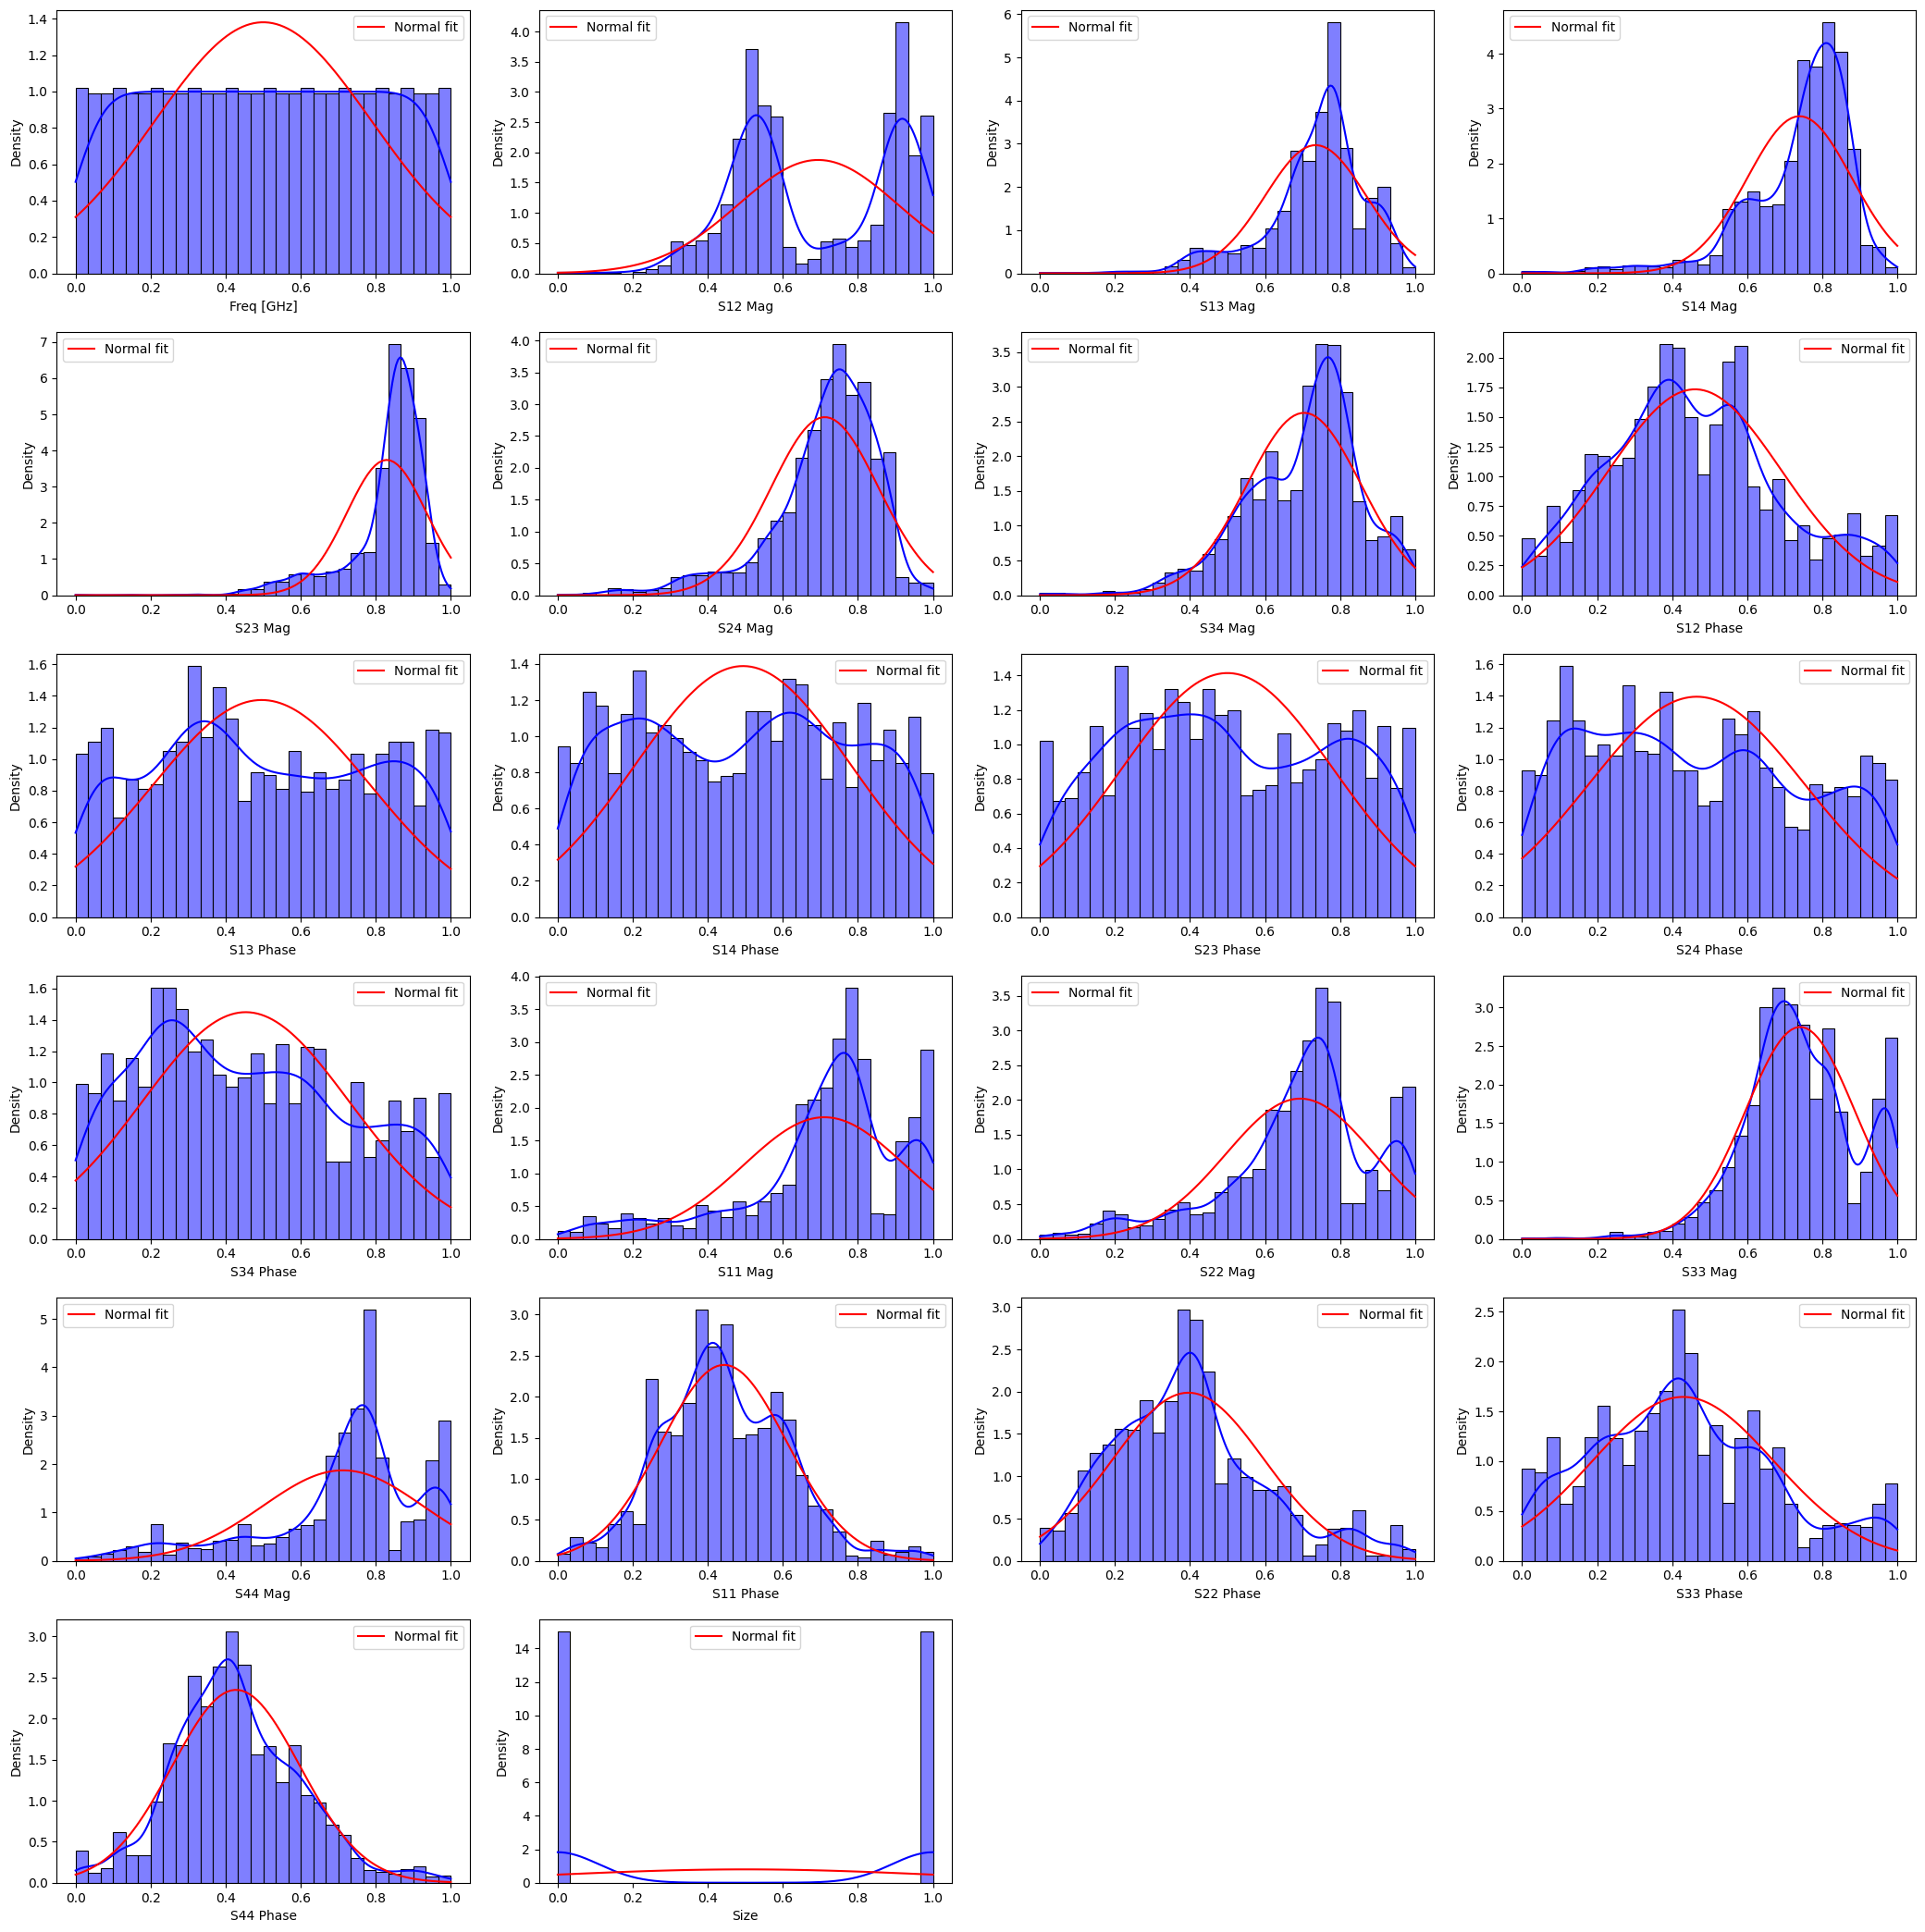

In [10]:
plt.figure(figsize=(21, 21))

for i, col in enumerate(df_scaled.columns):
    ax = plt.subplot(6, 4, i + 1)  # Adjust grid size to fit all columns
    sns.histplot(df_scaled[col], kde=True, stat="density", ax=ax, color="blue", bins=30)

    # Overlay a normal distribution if the column has enough data
    if df_scaled[col].notna().sum() > 1:
        mean = df_scaled[col].mean()
        std = df_scaled[col].std()
        x = np.linspace(df_scaled[col].min(), df_scaled[col].max(), 100)
        y = norm.pdf(x, mean, std)
        ax.plot(x, y, color="red", label="Normal fit")

    ax.set_xlabel(col)
    ax.legend()

plt.tight_layout()
plt.show()


Build a simple NN model to classify tumor size into two classes: {20 mm tumor, No tumor}
  
Optimizer: Stochastic Gradient Descent (SGD)
Learning Rate: 10^−3
Loss Function: Binary Cross Entropy or Mean Squared Error (MSE)
Metrics: Accuracy and F1 Score

In [11]:

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

print(df_scaled.head())
print(df_scaled.describe())
tumor_size_labels = df_scaled['Size']
df_scaled = df_scaled.drop(columns=['Size'])




   Freq [GHz]   S12 Mag   S13 Mag   S14 Mag   S23 Mag   S24 Mag   S34 Mag  \
0       0.000  0.268255  0.564493  0.590208  0.823800  0.563424  0.442645   
1       0.001  0.281244  0.558929  0.632092  0.747862  0.523172  0.432760   
2       0.002  0.296116  0.552374  0.669986  0.687889  0.477961  0.413863   
3       0.003  0.315606  0.552315  0.710136  0.650086  0.434399  0.382446   
4       0.004  0.332049  0.552242  0.750768  0.617575  0.386009  0.342749   

   S12 Phase  S13 Phase  S14 Phase  ...  S34 Phase   S11 Mag   S22 Mag  \
0   0.959977   0.914571   0.100032  ...   0.328981  0.991750  0.996631   
1   0.935646   0.907970   0.094835  ...   0.325680  0.994715  0.997031   
2   0.906807   0.902062   0.084762  ...   0.304415  0.996401  0.997557   
3   0.879385   0.896095   0.071157  ...   0.299008  0.997742  0.997784   
4   0.850319   0.887497   0.051270  ...   0.300523  0.997968  0.997809   

    S33 Mag   S44 Mag  S11 Phase  S22 Phase  S33 Phase  S44 Phase  Size  
0  0.993065  0.996

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, tumor_size_labels, test_size=0.3, random_state=42)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') # Sigmoid for binary classification
])

optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(optimizer=optimizer,
              loss= 'mean_squared_error',
              #'binary_crossentropy',  # Use binary cross-entropy for binary classification
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1) # Adjust epochs and batch_size

y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int) # Convert probabilities to class labels

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4975 - loss: 0.2581 - val_accuracy: 0.4823 - val_loss: 0.2597
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5097 - loss: 0.2569 - val_accuracy: 0.4681 - val_loss: 0.2585
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4938 - loss: 0.2563 - val_accuracy: 0.4610 - val_loss: 0.2574
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4800 - loss: 0.2574 - val_accuracy: 0.4539 - val_loss: 0.2563
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5180 - loss: 0.2520 - val_accuracy: 0.4539 - val_loss: 0.2554
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4992 - loss: 0.2520 - val_accuracy: 0.4468 - val_loss: 0.2545
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4958 - loss: 0.2540 - val_accuracy: 0.4610 - val_loss: 0.2537
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4850 - loss: 0.2539 - val_accuracy: 0.4681 - val_loss

In [13]:
!pip install scikit-learn==1.1.3
!pip install pycaret

  Using cached scikit_learn-1.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (10 kB)
Using cached scikit_learn-1.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (30.5 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.2
    Uninstalling scikit-learn-1.4.2:
      Successfully uninstalled scikit-learn-1.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.29.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.1.3 which is incompatible.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.1.3 which is incompatible.
pycaret 3.3.2 requires scikit-learn>1.4.0, but you have scikit-learn 1.1.3 which is incompatible.


  Using cached scikit_learn-1.6.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached scikit_learn-1.4.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.4.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.3
    Uninstalling scikit-learn-1.1.3:
      Successfully uninstalled scikit-learn-1.1.3


In [14]:
from pycaret.classification import *

data = pd.concat([df_scaled, pd.Series(tumor_size_labels, name='tumor_size')], axis=1)

clf = setup(data=data, target='tumor_size', session_id=123)

best_model = compare_models()

# Tune the best model
tuned_model = tune_model(best_model)

evaluate_model(tuned_model)

final_model = finalize_model(tuned_model)

# Save the model (optional)
# save_model(final_model, 'final_model')

,Description,Value
0,Session id,123
1,Target,tumor_size
2,Target type,Binary
3,Original data shape,"(2002, 22)"
4,Transformed data shape,"(2002, 22)"
5,Transformed train set shape,"(1401, 22)"
6,Transformed test set shape,"(601, 22)"
7,Numeric features,21
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0150
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2080
ada,Ada Boost Classifier,0.9993,1.0000,0.9986,1.0000,0.9993,0.9986,0.9986,0.3000
xgboost,Extreme Gradient Boosting,0.9993,1.0000,1.0000,0.9986,0.9993,0.9986,0.9986,0.1960
lightgbm,Light Gradient Boosting Machine,0.9993,1.0000,1.0000,0.9986,0.9993,0.9986,0.9986,0.9650
lr,Logistic Regression,0.9979,1.0000,1.0000,0.9958,0.9979,0.9957,0.9957,1.2960
knn,K Neighbors Classifier,0.9979,1.0000,0.9957,1.0000,0.9978,0.9957,0.9957,0.1430
ridge,Ridge Classifier,0.9979,1.0000,1.0000,0.9958,0.9979,0.9957,0.9957,0.1460
gbc,Gradient Boosting Classifier,0.9979,1.0000,1.0000,0.9958,0.9979,0.9957,0.9957,1.1120
lda,Linear Discriminant Analysis,0.9971,1.0000,1.0000,0.9944,0.9972,0.9943,0.9943,0.0380


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…